In [24]:
#
# 折れ線グラフを描く
#
%matplotlib inline
import datetime
import pymongo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mf
from matplotlib.dates import date2num

In [25]:
client = pymongo.MongoClient('mongodb://ec2-54-250-245-71.ap-northeast-1.compute.amazonaws.com:27017/bitflyer')
db = client.bitflyer
fx_btc_jpy = db.lightning_executions_FX_BTC_JPY_OHLC_86400
btc_jpy = db.lightning_executions_BTC_JPY_OHLC_86400

In [26]:
fx_btc_jpy_date=[]
fx_btc_jpy_price = []
btc_jpy_date=[]
btc_jpy_price = []

#open_dateがafter以降のデータ
after = datetime.datetime(2017,5,1)

for data in fx_btc_jpy.find({'open_date':{'$gte':after}}).sort('id',1).limit(100):
    fx_btc_jpy_date.append(data['open_date'])
    fx_btc_jpy_price.append(data['close_price'])
    
for data in btc_jpy.find({'open_date':{'$gte':after}}).sort('id',1).limit(100):
    btc_jpy_date.append(data['open_date'])
    btc_jpy_price.append(data['close_price'])


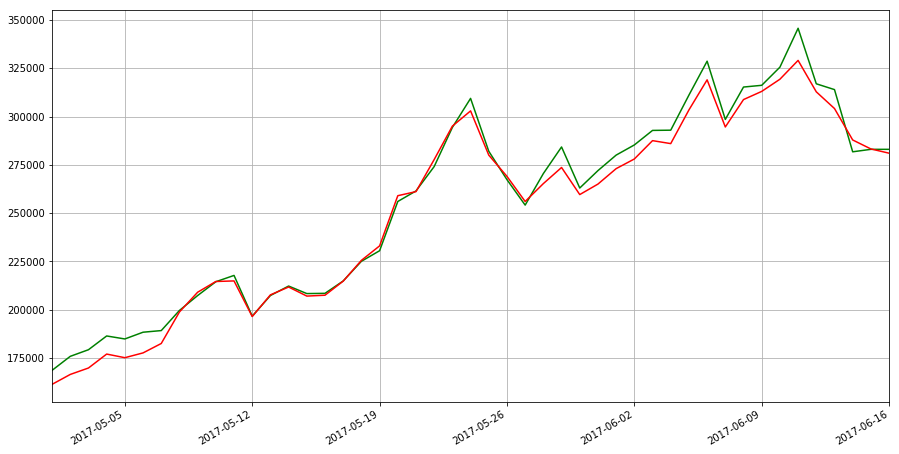

In [27]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.grid()
ax.set_xlim(fx_btc_jpy_date[0], fx_btc_jpy_date[-1])
ax.plot(fx_btc_jpy_date, fx_btc_jpy_price, color='g')
ax.plot(btc_jpy_date, btc_jpy_price, color='r')
fig.autofmt_xdate()